In [1]:
import numpy as np
import random
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns; sns.set()

# Curve Fitting for L. Plantarum GFP/mCherry 
1. Define sigmoid function in two forms 
2. Fit data to sigmoid function to find r and k values 
3. Find dilution rate/or threshold time to keep OD basically constant

In [2]:
#Defining logistic function
def sigmoid(x, L, x0, k):
     y = L / (1 + np.exp(-k*(x-x0)))
     return y
#Defining logistic function, but in log form
def log_sigmoid(x,L,x0,k):
    y=math.log(L)-math.log(np.exp(-k*(math.log(x)-x0)))
    return y

In [3]:
data1=pd.read_excel("5_6_OD.xlsx")
gfp_data=pd.read_excel("5_6_GFP.xlsx")
mc_data=pd.read_excel("5_6_mC.xlsx")
plate=pd.read_excel("5_6_plate.xlsx",index_col=0)
order=['Time','Temp']
for well in plate.itertuples():
    for entry in well[1:]:
        order.append(entry)
print(order)
data1.columns=order

gfp_data.columns=order
mc_data.columns=order
       

['Time', 'Temp', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', '1x Media', '1x Media', '1x Media', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', 'E Coli mC', '1x Media', '1x Media', '1x Media', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', '1x Media', '1x Media', '1x Media', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', 'LP LF mC', '1x Media', '1x Media', '1x Media', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', '1x Media', '1x Media', '1x Media', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', 'LP LF GFP', '1x Media', '1x Media', '1x Media', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [10]:
data1['Time']=[5*x for x in range(0,254)]
gfp_data['Time']=[5*x for x in range(0,254)]
mc_data['Time']=[5*x for x in range(0,254)]
samples=['E Coli mC','LP LF mC','LP LF GFP']


for sample in samples:
    for dilution in dilutions:
        data1['NormAve '+sample]=(data1[sample].mean(axis=1)-data1['1x Media'].mean(axis=1))
        gfp_data['NormAve '+sample]=(gfp_data[sample].mean(axis=1)-gfp_data['1x Media'].mean(axis=1))
        mc_data['NormAve '+sample]=(mc_data[sample].mean(axis=1)-mc_data['1x Media'].mean(axis=1))
        

[Text(0.5,1,'Growth Rate of L Plantarum on diluted media')]

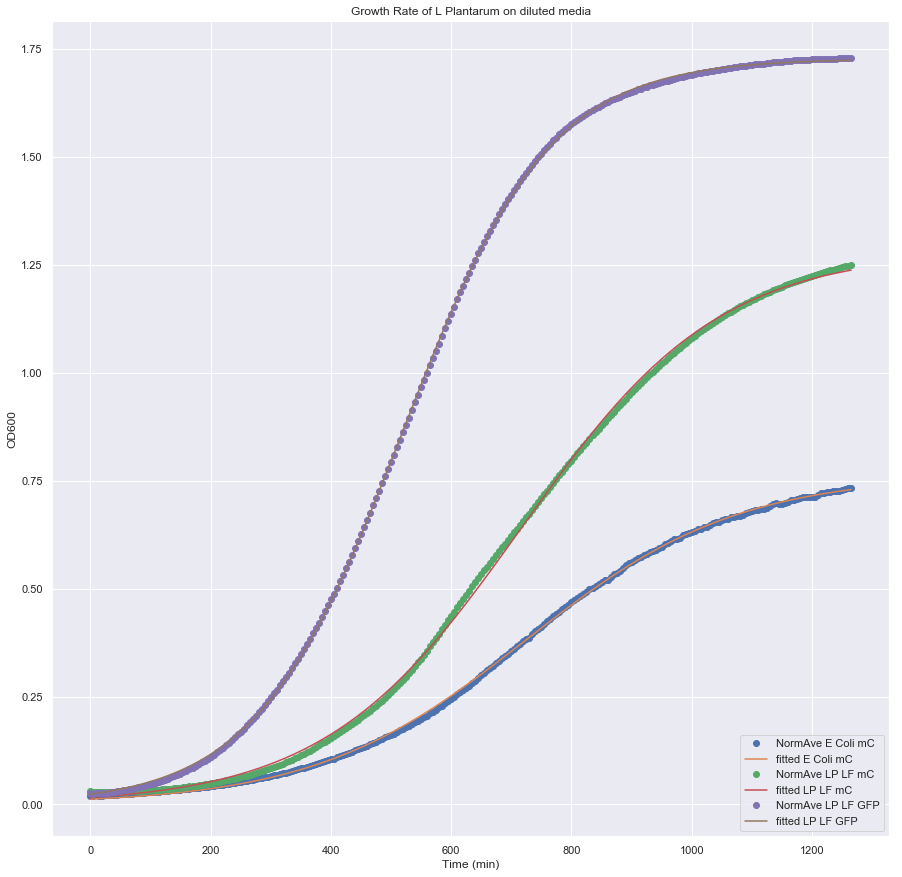

In [12]:
r_vals={}
k_vals={}
threshold_time={}
fig, ax = plt.subplots(1,1,figsize=(15,15), sharex=True, sharey=True) 
for sample in samples:
    x_vals=data1['Time'].values
    y_vals=data1['NormAve '+sample].values 
    ax.plot(data1['Time'],data1['NormAve '+sample], 'o',label='NormAve '+sample)
    #gets fit
    try:
        popt, pcov = curve_fit(sigmoid,x_vals,y_vals, p0=[0.5,1000,0.01])
    except RuntimeError:
        pass

    r_vals[sample]=popt[2]
    k_vals[sample+' '+dilution]=popt[0]
    try:
        threshold_time[sample]=5*data1[data1['NormAve '+sample].gt(0.05)].index[0]
    except IndexError:
        threshold_time[sample]=5
    fitted_y=sigmoid(x_vals,*popt)
    ax.plot(x_vals,fitted_y,label="fitted "+sample)
ax.legend(loc='lower right')
ax.set_xlabel("Time (min)")
ax.set_ylabel("OD600")
ax.set(title='Growth Rate of L Plantarum on diluted media')

In [13]:
print(r_vals)
print(k_vals)
print(threshold_time)
doubling_time={}
for r_val in r_vals:
    doubling_time[r_val]=np.log(2)/(r_vals[r_val])
print(doubling_time)

{'E Coli mC': 0.005689353723554581, 'LP LF mC': 0.006088461231832084, 'LP LF GFP': 0.008233203297058496}
{'E Coli mC 1x': 0.7628673148621519, 'LP LF mC 1x': 1.2812292985937068, 'LP LF GFP 1x': 1.7269620507627284}
{'E Coli mC': 240, 'LP LF mC': 205, 'LP LF GFP': 110}
{'E Coli mC': 121.8323230088922, 'LP LF mC': 113.84603665306904, 'LP LF GFP': 84.1892463420147}


/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[Text(0.5,1,'Growth Rate of L Plantarum on diluted media')]

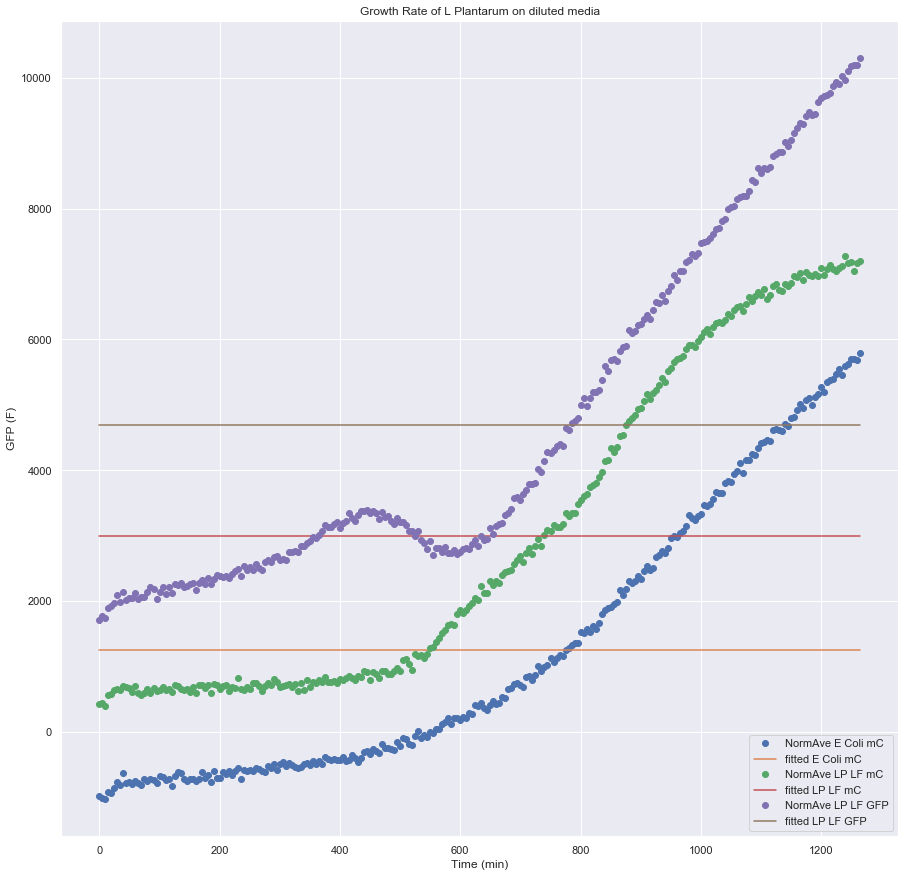

In [15]:
r_vals={}
k_vals={}
threshold_time={}
fig, ax = plt.subplots(1,1,figsize=(15,15), sharex=True, sharey=True) 
for sample in samples:
    x_vals=gfp_data['Time'].values
    y_vals=gfp_data['NormAve '+sample].values 
    ax.plot(gfp_data['Time'],gfp_data['NormAve '+sample], 'o',label='NormAve '+sample)
    #gets fit
    try:
        popt, pcov = curve_fit(sigmoid,x_vals,y_vals, p0=[0.5,1000,0.01])
    except RuntimeError:
        pass

    r_vals[sample]=popt[2]
    k_vals[sample]=popt[0]
    try:
        threshold_time[sample]=5*gfp_data[gfp_data['NormAve '+sample].gt(0.05)].index[0]
    except IndexError:
        threshold_time[sample]=5
    fitted_y=sigmoid(x_vals,*popt)
    ax.plot(x_vals,fitted_y,label="fitted "+sample)
ax.legend(loc='lower right')
ax.set_xlabel("Time (min)")
ax.set_ylabel("GFP (F)")
ax.set(title='Growth Rate of L Plantarum on diluted media')

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/cm

[Text(0.5,1,'Growth Rate of L Plantarum on diluted media')]

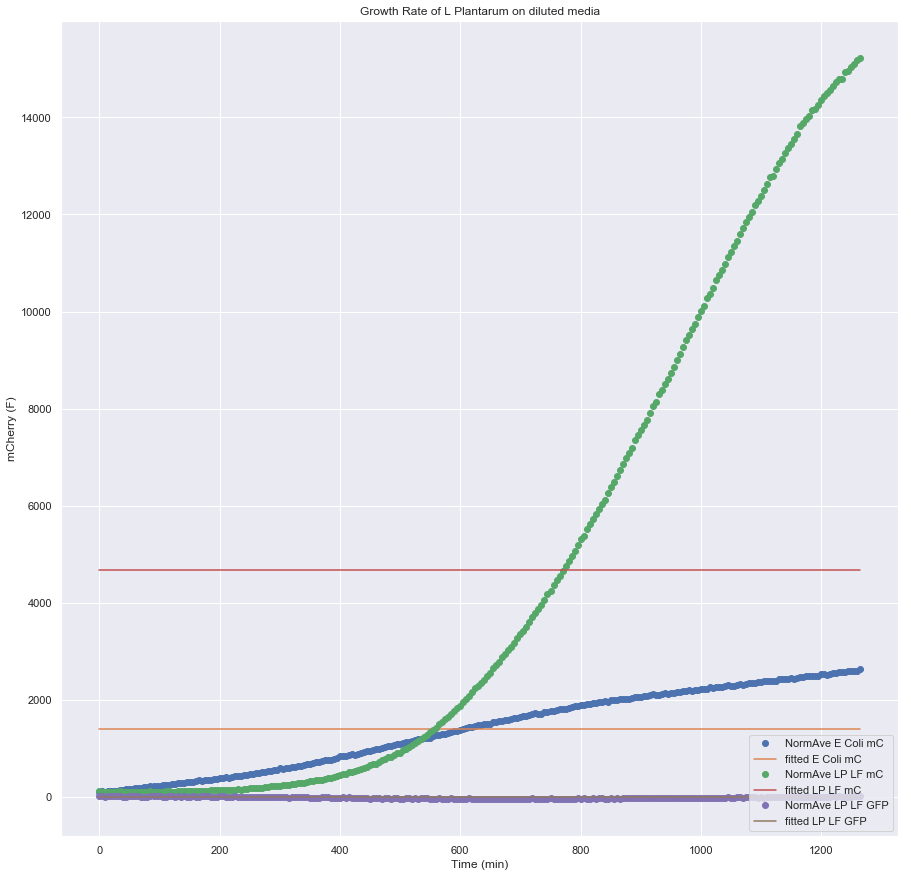

In [17]:
r_vals={}
k_vals={}
threshold_time={}
fig, ax = plt.subplots(1,1,figsize=(15,15), sharex=True, sharey=True) 
for sample in samples:
    x_vals=mc_data['Time'].values
    y_vals=mc_data['NormAve '+sample].values 
    ax.plot(mc_data['Time'],mc_data['NormAve '+sample], 'o',label='NormAve '+sample)
    #gets fit
    try:
        popt, pcov = curve_fit(sigmoid,x_vals,y_vals, p0=[0.5,1000,0.01])
    except RuntimeError:
        pass

    r_vals[sample+' '+dilution]=popt[2]
    k_vals[sample+' '+dilution]=popt[0]
    try:
        threshold_time[sample]=5*mc_data[mc_data['NormAve '+sample].gt(0.05)].index[0]
    except IndexError:
        threshold_time[sample]=5
    fitted_y=sigmoid(x_vals,*popt)
    ax.plot(x_vals,fitted_y,label="fitted "+sample)
ax.legend(loc='lower right')
ax.set_xlabel("Time (min)")
ax.set_ylabel("mCherry (F)")
ax.set(title='Growth Rate of L Plantarum on diluted media')

# Conclusions

Growth rate/doubling time is about the same as WF isolate

GFP and mCherry Curves don't fit the OD curves at all. We will have to use flow cytometer to get cell counts.